In [1]:
# train_loader, val_loader = get_train_val_loaders(csv_path_train='data/train_all_qualities.csv', csv_path_val='data/val_all_qualities.csv',
#                                                      batch_size=8, mean=0, std=1, qualities=True)

In [2]:
# print('quality', np.unique(train_loader.dataset.quality, return_counts=True)[1])
# print('artifact', np.unique(train_loader.dataset.artifact, return_counts=True)[1])
# print('field_def', np.unique(train_loader.dataset.field_def, return_counts=True)[1])
# print('clarity', np.unique(train_loader.dataset.clarity, return_counts=True)[1])

In [3]:
# csv_train_path = train_loader.dataset.csv_path #[10,4,1,1,1] [8,3,1,1,1]

In [4]:
# train_loader_MOD = modify_MT_dataset(train_loader, csv_train_path=csv_train_path, keep_samples=[8,3,1,1,1], task='clarity')
# print('quality', np.unique(train_loader_MOD.quality, return_counts=True)[1])
# print('artifact', np.unique(train_loader_MOD.artifact, return_counts=True)[1])
# print('field_def', np.unique(train_loader_MOD.field_def, return_counts=True)[1])
# print('clarity', np.unique(train_loader_MOD.clarity, return_counts=True)[1])

In [5]:
# csv_train_path = train_loader.dataset.csv_path #[10,4,1,1,1] [8,3,1,1,1]

In [6]:
# train_loader_MOD = modify_MT_dataset(train_loader, csv_train_path=csv_train_path, keep_samples=[10,4,1,1,1], task='field_def')
# print('quality', np.unique(train_loader_MOD.quality, return_counts=True)[1])
# print('artifact', np.unique(train_loader_MOD.artifact, return_counts=True)[1])
# print('field_def', np.unique(train_loader_MOD.field_def, return_counts=True)[1])
# print('clarity', np.unique(train_loader_MOD.clarity, return_counts=True)[1])

In [7]:
# csv_train_path = train_loader.dataset.csv_path #[10,4,1,1,1] [8,3,1,1,1]

In [8]:
# train_loader_MOD = modify_MT_dataset(train_loader, csv_train_path=csv_train_path, keep_samples=[1,5,1,2,2,5], task='artifact')
# print('quality', np.unique(train_loader_MOD.quality, return_counts=True)[1])
# print('artifact', np.unique(train_loader_MOD.artifact, return_counts=True)[1])
# print('field_def', np.unique(train_loader_MOD.field_def, return_counts=True)[1])
# print('clarity', np.unique(train_loader_MOD.clarity, return_counts=True)[1])

In [9]:
import pandas as pd

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [11]:
%load_ext autoreload
%autoreload 2

from utils.get_loaders import get_train_val_loaders, modify_MT_dataset
import numpy as np

# Standard Fundus
## Both OD+MAC

In [12]:
df_all = pd.read_csv('results_multi_split_fundus_both.csv')

In [13]:
df_all = df_all.drop(['run', 'operation', 'started', 'status', 'label', 'batch_size', 'decay_f', 'acc', 
        'optimizer', 'save_model', 'step'], axis=1)
df_all.columns

Index(['time', 'base_loss', 'csv_train', 'exp', 'lambd', 'load_checkpoint',
       'lr', 'metric', 'model_name', 'n_epochs', 'oversample', 'patience',
       'pretrained', 'auc', 'kappa'],
      dtype='object')

In [14]:
df_train1 = df_all[df_all.csv_train=='train_all_1.csv']
df_train2 = df_all[df_all.csv_train=='train_all_2.csv']
df_train3 = df_all[df_all.csv_train=='train_all_3.csv']
df_train4 = df_all[df_all.csv_train=='train_all_4.csv']

## First fold - trained

In [15]:
df_train1.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
16,0:12:11,focal_loss,train_all_1.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.908872,0.857692
24,0:10:44,ce,train_all_1.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.910152,0.855142
37,0:13:30,ce,train_all_1.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.912566,0.855063
29,0:20:15,focal_loss,train_all_1.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.914934,0.854528
20,0:20:21,gls,train_all_1.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.911746,0.853726


### Best models this fold:

```
python train.py --csv_train train_all_1.csv --base_loss ce --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_both_f1 
```

## Second fold - trained

In [16]:
df_train2.sort_values('kappa', ascending=False).head(15)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
32,0:42:15,gls,train_all_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.935597,0.857399
15,0:40:50,focal_loss,train_all_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.940132,0.854205
28,0:40:47,focal_loss,train_all_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.940132,0.854205
19,0:29:06,gls,train_all_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.936100,0.841414
6,0:31:39,gls,train_all_2.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.928753,0.840415
23,0:22:25,ce,train_all_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.936555,0.837230
36,0:25:03,ce,train_all_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.938209,0.837085
2,0:28:56,focal_loss,train_all_2.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.929571,0.832027
10,0:15:48,ce,train_all_2.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.927665,0.829735


### Best models this fold:

```
python train.py --csv_train train_all_2.csv --base_loss gls --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_both_f2 
```

## Third fold - trained

In [17]:
df_train3.sort_values('kappa', ascending=False).head(15)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
31,0:38:01,gls,train_all_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.938523,0.882619
5,0:23:04,gls,train_all_3.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.927763,0.882361
18,0:28:34,gls,train_all_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.935997,0.880022
27,0:37:52,focal_loss,train_all_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.939830,0.877664
35,0:35:13,ce,train_all_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.941209,0.876020
22,0:23:04,ce,train_all_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.937363,0.873125
1,0:24:21,focal_loss,train_all_3.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.928141,0.873123
9,0:27:03,ce,train_all_3.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.936575,0.870542
14,0:17:37,focal_loss,train_all_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.927314,0.866378


### Best models this fold:

```
python train.py --csv_train train_all_3.csv --base_loss gls --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_both_f3 
```

## Fourth fold - trained

In [18]:
df_train4.sort_values('kappa', ascending=False).head(15)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
30,0:43:29,gls,train_all_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.943784,0.873273
0,0:12:12,focal_loss,train_all_4.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.915618,0.851332
13,0:12:13,focal_loss,train_all_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.926175,0.849352
26,0:29:47,focal_loss,train_all_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.937589,0.848942
21,0:09:32,ce,train_all_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.922933,0.848247
34,0:12:14,ce,train_all_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,True,0.930879,0.847745
8,0:12:12,ce,train_all_4.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.925101,0.845612
17,0:09:33,gls,train_all_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.916541,0.842871
4,0:12:15,gls,train_all_4.csv,2.0,10.0,models/resnet50_eyepacs,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,True,0.916695,0.840031


### Best models this fold:

```
python train.py --csv_train train_all_4.csv --base_loss gls --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_both_f4 
```

## MIXING COEFFICIENTS - ok

In [19]:
k_auc_f1 = 0.5*(0.908872+0.857692)
k_auc_f2 = 0.5*(0.935597+0.857399)
k_auc_f3 = 0.5*(0.938523+0.882619)
k_auc_f4 = 0.5*(0.943784+0.873273)
coeff_sum = k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4

In [20]:
coeff_f1 = k_auc_f1/coeff_sum
coeff_f2 = k_auc_f2/coeff_sum
coeff_f3 = k_auc_f3/coeff_sum
coeff_f4 = k_auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.24543250197735156 0.24910475607755134 0.2530151398511676 0.25244760209392947


In [21]:
overall_mean_k_auc = (k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4)/4
overall_mean_k_auc

0.8997198750000001

# Standard Fundus
## OD

In [22]:
df_all = pd.read_csv('results_multi_split_fundus_od.csv')

In [23]:
df_all = df_all.drop(['run', 'operation', 'started',  'status', 'label', 'batch_size', 'decay_f', 'acc', 'load_checkpoint', 
        'optimizer', 'pretrained', 'save_model', 'step'], axis=1)
df_all.columns

Index(['time', 'base_loss', 'csv_train', 'exp', 'lambd', 'lr', 'metric',
       'model_name', 'n_epochs', 'oversample', 'patience', 'auc', 'kappa'],
      dtype='object')

In [24]:
df_train1 = df_all[df_all.csv_train=='train_od_1.csv']
df_train2 = df_all[df_all.csv_train=='train_od_2.csv']
df_train3 = df_all[df_all.csv_train=='train_od_3.csv']
df_train4 = df_all[df_all.csv_train=='train_od_4.csv']

## First fold - trained

In [25]:
df_train1.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,lr,metric,model_name,n_epochs,oversample,patience,auc,kappa
3,0:06:49,focal_loss,train_od_1.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.915289,0.872834
16,0:06:49,focal_loss,train_od_1.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.915289,0.872834
7,0:06:49,ce,train_od_1.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.916071,0.871407
20,0:06:49,ce,train_od_1.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.916071,0.871407
11,0:06:49,gls,train_od_1.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.911026,0.861434


### Best models this fold:

```
python train.py --csv_train train_od_1.csv --base_loss focal_loss --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_od_f1 
```

## Second fold - trained

In [26]:
df_train2.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,lr,metric,model_name,n_epochs,oversample,patience,auc,kappa
15,0:06:38,focal_loss,train_od_2.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.901828,0.859852
2,0:09:57,focal_loss,train_od_2.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.914989,0.859409
19,0:07:57,ce,train_od_2.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.907925,0.854485
10,0:07:19,gls,train_od_2.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.902121,0.850788
23,0:07:19,gls,train_od_2.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.902121,0.850788


### Best models this fold:

```
python train.py --csv_train train_od_2.csv --base_loss focal_loss --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_od_f2 
```

## Third fold - trained

In [27]:
df_train3.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,lr,metric,model_name,n_epochs,oversample,patience,auc,kappa
1,0:14:03,focal_loss,train_od_3.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.906088,0.753158
14,0:14:02,focal_loss,train_od_3.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.906088,0.753158
5,0:10:43,ce,train_od_3.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.905635,0.750663
22,0:12:44,gls,train_od_3.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.899344,0.750505
9,0:10:44,gls,train_od_3.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.903115,0.742196


### Best models this fold:

```
python train.py --csv_train train_od_3.csv --base_loss focal_loss --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_od_f3 
```

## Fourth fold - trained

In [28]:
df_train4.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,lr,metric,model_name,n_epochs,oversample,patience,auc,kappa
8,0:16:09,gls,train_od_4.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.920812,0.826630
0,0:07:44,focal_loss,train_od_4.csv,1.0,10.0,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.921794,0.821830
13,0:07:43,focal_loss,train_od_4.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.921794,0.821830
21,0:11:56,gls,train_od_4.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.918053,0.819788
17,0:06:19,ce,train_od_4.csv,1.0,10.0,0.0001,kappa,resnet50,50.0,1/4/2/2/7,5.0,0.911855,0.814889


### Best models this fold:

```
python train.py --csv_train train_od_4.csv --base_loss gls --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_od_f4 
```

## MIXING COEFFICIENTS - ok

In [29]:
k_auc_f1 = 0.5*0.915289+0.5*0.872834
k_auc_f2 = 0.5*0.901828+0.5*0.859852
k_auc_f3 = 0.5*0.906088+0.5*0.753158
k_auc_f4 = 0.5*0.920812+0.5*0.826630
coeff_sum = k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4

In [30]:
coeff_f1 = k_auc_f1/coeff_sum
coeff_f2 = k_auc_f2/coeff_sum
coeff_f3 = k_auc_f3/coeff_sum
coeff_f4 = k_auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.2570438170623667 0.2532426190158228 0.23851766644993863 0.25119589747187193


In [31]:
overall_mean_k_auc = (k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4)/4
overall_mean_k_auc

0.869561375

# Standard Fundus
## MAC

In [32]:
df_all = pd.read_csv('results_multi_split_fundus_mac.csv')

In [33]:
df_all = df_all.drop(['run', 'operation', 'started',  'status', 'label', 'batch_size', 'decay_f', 'acc', 
        'optimizer', 'pretrained', 'save_model', 'step'], axis=1)
df_all.columns

Index(['time', 'base_loss', 'csv_train', 'exp', 'lambd', 'load_checkpoint',
       'lr', 'metric', 'model_name', 'n_epochs', 'oversample', 'patience',
       'auc', 'kappa'],
      dtype='object')

In [34]:
df_train1 = df_all[df_all.csv_train=='train_mac_1.csv']
df_train2 = df_all[df_all.csv_train=='train_mac_2.csv']
df_train3 = df_all[df_all.csv_train=='train_mac_3.csv']
df_train4 = df_all[df_all.csv_train=='train_mac_4.csv']

## First fold - trained

In [35]:
df_train1.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,auc,kappa
3,0:08:57,focal_loss,train_mac_1.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.906182,0.852420
7,0:08:57,ce,train_mac_1.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.908279,0.844220
11,0:08:56,gls,train_mac_1.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.904655,0.834397


### Best models this fold:

```
python train.py --csv_train train_mac_1.csv --base_loss focal_loss --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_mac_f1 
```

## Second fold - trained

In [36]:
df_train2.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,auc,kappa
10,0:07:25,gls,train_mac_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.891001,0.844584
2,0:09:24,focal_loss,train_mac_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.898606,0.842972
6,0:07:24,ce,train_mac_2.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.896038,0.836269


### Best models this fold:

```
python train.py --csv_train train_mac_2.csv --base_loss gls --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_mac_f2 
```

## Third fold - trained

In [37]:
df_train3.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,auc,kappa
1,0:05:24,focal_loss,train_mac_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.885983,0.805524
5,0:12:05,ce,train_mac_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.899887,0.801160
9,0:11:27,gls,train_mac_3.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.900774,0.788709


### Best models this fold:

```
python train.py --csv_train train_mac_3.csv --base_loss focal_loss --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_mac_f3 
```

## Fourth fold

In [38]:
df_train4.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,auc,kappa
4,0:09:10,ce,train_mac_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.927619,0.861877
8,0:08:30,gls,train_mac_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.924584,0.861352
0,0:10:35,focal_loss,train_mac_4.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/4/2/2/7,5.0,0.926112,0.853537


### Best models this fold:

```
python train.py --csv_train train_mac_4.csv --base_loss ce --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/4/2/2/7 --save_model True --save_path best_mac_f4 
```

## MIXING COEFFICIENTS - ok

In [39]:
k_auc_f1 = 0.5*0.906182+0.5*0.852420
k_auc_f2 = 0.5*0.891001+0.5*0.844584
k_auc_f3 = 0.5*0.885983+0.5*0.805524
k_auc_f4 = 0.5*0.927619+0.5*0.861877
coeff_sum = k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4

In [40]:
coeff_f1 = k_auc_f1/coeff_sum
coeff_f2 = k_auc_f2/coeff_sum
coeff_f3 = k_auc_f3/coeff_sum
coeff_f4 = k_auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.2521224511447 0.24882261271735967 0.24250335833145767 0.2565515778064827


In [41]:
overall_mean_k_auc = (k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4)/4
overall_mean_k_auc

0.87189875

# MIXING COEFFICIENTS BOTH vs OD/MAC

In [42]:
coeff_both_vs_od =  0.8997198750000001/(0.8997198750000001+0.869561375), 0.869561375/(0.8997198750000001+0.869561375)  
coeff_both_vs_mac = 0.8997198750000001/(0.8997198750000001+0.87189875), 0.87189875/(0.8997198750000001+0.87189875)
print('both/od = ', coeff_both_vs_od[0], coeff_both_vs_od[1])
print('both/mac = ', coeff_both_vs_mac[0], coeff_both_vs_mac[1])

both/od =  0.50852281116979 0.49147718883020997
both/mac =  0.5078518944787003 0.4921481055212998


# UW
## Both OD+MAC

In [43]:
df_all = pd.read_csv('results_multi_split_fundus_both_UW.csv')

In [44]:
df_all = df_all.drop(['run', 'operation', 'started', 'status', 'label', 'batch_size', 'decay_f', 'acc',  
        'optimizer', 'save_model', 'step'], axis=1)
df_all.columns

Index(['time', 'base_loss', 'csv_train', 'exp', 'lambd', 'load_checkpoint',
       'lr', 'metric', 'model_name', 'n_epochs', 'oversample', 'patience',
       'pretrained', 'auc', 'kappa'],
      dtype='object')

In [45]:
df_train1 = df_all[df_all.csv_train=='train_all_1_UW.csv']
df_train2 = df_all[df_all.csv_train=='train_all_2_UW.csv']
df_train3 = df_all[df_all.csv_train=='train_all_3_UW.csv']
df_train4 = df_all[df_all.csv_train=='train_all_4_UW.csv']

## First fold - trained

In [46]:
df_train1.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
23,0:03:38,gls,train_all_1_UW.csv,1.0,1.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.865708,0.797852
49,0:03:03,ce,train_all_1_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.884569,0.796996
14,0:03:29,focal_loss,train_all_1_UW.csv,1.0,1.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.861982,0.795035
13,0:03:04,focal_loss,train_all_1_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.884626,0.790018
41,0:02:31,gls,train_all_1_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.891016,0.788746


### Best models this fold:

```
python train.py --csv_train train_all_1_UW.csv --base_loss ce --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/1/1/3/8 --save_model True --save_path best_both_UW_f1 
```

## Second fold - trained

In [47]:
df_train2.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
46,0:02:42,ce,train_all_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.812002,0.651293
9,0:02:59,focal_loss,train_all_2_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.810200,0.633370
8,0:02:59,focal_loss,train_all_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.803573,0.630272
11,0:04:06,focal_loss,train_all_2_UW.csv,1.0,1.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.819037,0.624776
38,0:02:43,gls,train_all_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.810989,0.621503


### Best models this fold:

```
python train.py --csv_train train_all_2_UW.csv --base_loss ce --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/1/1/3/8 --save_model True --save_path best_both_UW_f2 
```

## Third fold - trained

In [48]:
df_train3.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
28,0:01:55,ce,train_all_3_UW.csv,1.0,1.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.806678,0.739156
45,0:01:55,ce,train_all_3_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.813419,0.737165
5,0:03:08,focal_loss,train_all_3_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.821324,0.726483
37,0:02:12,gls,train_all_3_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.812335,0.725806
7,0:02:52,focal_loss,train_all_3_UW.csv,1.0,1.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.804497,0.694255


### Best models this fold:

```
python train.py --csv_train train_all_3_UW.csv --base_loss ce --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/1/1/3/8 --save_model True --save_path best_both_UW_f3 
```

## Fourth fold - trained

In [49]:
df_train4.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
26,0:03:48,ce,train_all_4_UW.csv,1.0,1.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.867193,0.712310
43,0:03:56,ce,train_all_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.867004,0.711499
1,0:03:31,focal_loss,train_all_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.860838,0.692366
35,0:03:48,gls,train_all_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.848806,0.684709
3,0:05:11,focal_loss,train_all_4_UW.csv,1.0,1.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/1/1/3/8,5.0,True,0.858952,0.680941


### Best models this fold:

```
python train.py --csv_train train_all_4_UW.csv --base_loss ce --exp 1 --lambd 10 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 5 --oversample 1/1/1/3/8 --save_model True --save_path best_both_UW_f4 
```

## MIXING COEFFICIENTS - ok

In [50]:
k_auc_f1 = 0.5*0.884569+0.5*0.796996
k_auc_f2 = 0.5*0.812000+0.5*0.633370
k_auc_f3 = 0.5*0.813419+0.5*0.737165
k_auc_f4 = 0.5*0.867004+0.5*0.711499
coeff_sum = k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4

In [51]:
coeff_f1 = k_auc_f1/coeff_sum
coeff_f2 = k_auc_f2/coeff_sum
coeff_f3 = k_auc_f3/coeff_sum
coeff_f4 = k_auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.26879141409668955 0.2310365916232392 0.24785462710968728 0.252317367170384


In [52]:
overall_mean_k_auc = (k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4)/4
overall_mean_k_auc

0.78200275

# UW
## OD

In [53]:
df_all = pd.read_csv('results_multi_split_fundus_od_UW.csv')

In [54]:
df_all = df_all.drop(['run', 'operation', 'started', 'status', 'label', 'batch_size', 'decay_f', 'acc',  
        'optimizer', 'save_model', 'step'], axis=1)
df_all.columns

Index(['time', 'base_loss', 'csv_train', 'exp', 'lambd', 'load_checkpoint',
       'lr', 'metric', 'model_name', 'n_epochs', 'oversample', 'patience',
       'pretrained', 'auc', 'kappa'],
      dtype='object')

In [55]:
df_train1 = df_all[df_all.csv_train=='train_od_1_UW.csv']
df_train2 = df_all[df_all.csv_train=='train_od_2_UW.csv']
df_train3 = df_all[df_all.csv_train=='train_od_3_UW.csv']
df_train4 = df_all[df_all.csv_train=='train_od_4_UW.csv']

### First fold - trained

In [56]:
df_train1.sort_values('kappa', ascending=False).head(15)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
3,0:02:51,focal_loss,train_od_1_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.873117,0.808781
7,0:02:56,gls,train_od_1_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.895947,0.806191
20,0:02:34,gls,train_od_1_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.895947,0.806191
30,0:02:33,gls,train_od_1_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.895947,0.806191
11,0:02:28,ce,train_od_1_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.881695,0.803152
46,0:02:22,ce,train_od_1_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.912492,0.748581
16,0:02:02,focal_loss,train_od_1_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.840679,0.746931
28,0:01:39,ce,train_od_1_UW.csv,1.0,10.0,experiments/best_od_f1,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.862557,0.742703
24,0:02:01,ce,train_od_1_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.852241,0.733981
34,0:02:00,ce,train_od_1_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.852241,0.733981


#### Best models this fold:

```
python train.py --csv_train train_od_1_UW.csv --base_loss ce --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 10 --oversample 1/2/2/4/9 --save_model True --save_path best_od_UW_f1 
```

### Second fold - trained

In [57]:
df_train2.sort_values('kappa', ascending=False).head(15)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
6,0:01:27,gls,train_od_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.797428,0.725385
19,0:01:05,gls,train_od_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.797428,0.725385
29,0:01:05,gls,train_od_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.797428,0.725385
2,0:00:52,focal_loss,train_od_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.650469,0.650350
15,0:00:29,focal_loss,train_od_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.650469,0.650350
10,0:01:27,ce,train_od_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.805359,0.628378
23,0:01:05,ce,train_od_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.805359,0.628378
33,0:01:04,ce,train_od_2_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.805359,0.628378
41,0:00:43,gls,train_od_2_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.752350,0.553875
45,0:00:38,ce,train_od_2_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.742357,0.548005


#### Best models this fold:

```
python train.py --csv_train train_od_2_UW.csv --base_loss gls --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 10 --oversample 1/2/2/4/9 --save_model True --save_path best_od_UW_f2 
```

### Third fold - trained

In [58]:
df_train3.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
9,0:03:03,ce,train_od_3_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.579769,0.371838
1,0:02:20,focal_loss,train_od_3_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.610553,0.260529
44,0:01:16,ce,train_od_3_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.703102,0.206944
5,0:01:33,gls,train_od_3_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.604589,0.151112
40,0:01:16,gls,train_od_3_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.704042,0.049855


#### Best models this fold:

```
python train.py --csv_train train_od_3_UW.csv --base_loss ce --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 10 --oversample 1/2/2/4/9 --save_model True --save_path best_od_UW_f3 
```

### Fourth fold - trained

In [59]:
df_train4.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
43,0:01:21,ce,train_od_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.828188,0.621160
35,0:01:50,focal_loss,train_od_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.804935,0.555638
39,0:01:22,gls,train_od_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.817226,0.548741
8,0:01:45,ce,train_od_4_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,10.0,True,0.817406,0.487034
21,0:01:22,ce,train_od_4_UW.csv,1.0,10.0,experiments/best_both_f3,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.817406,0.487034


#### Best models this fold:

```
python train.py --csv_train train_od_4_UW.csv --base_loss ce --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 10 --oversample 1/2/2/4/9 --save_model True --save_path best_od_UW_f4 
```

## MIXING COEFFICIENTS

In [60]:
k_auc_f1 = 0.5*0.912492+0.5*0.748581
k_auc_f2 = 0.5*0.752350+0.5*0.553875
k_auc_f3 = 0.5*0.703102+0.5*0.206944
k_auc_f4 = 0.5*0.828188+0.5*0.621160
coeff_sum = k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4

In [61]:
coeff_f1 = k_auc_f1/coeff_sum
coeff_f2 = k_auc_f2/coeff_sum
coeff_f3 = k_auc_f3/coeff_sum
coeff_f4 = k_auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.3118395056444037 0.24522255088148517 0.17084637144404072 0.2720915720300705


In [62]:
overall_mean_k_auc = (k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4)/4
overall_mean_k_auc

0.6658364999999999

# UW
## MAC

In [63]:
df_all = pd.read_csv('results_multi_split_fundus_mac_UW.csv')

In [64]:
df_all = df_all.drop(['run', 'operation', 'started', 'status', 'label', 'batch_size', 'decay_f', 'acc',  
        'optimizer', 'save_model', 'step'], axis=1)
df_all.columns

Index(['time', 'base_loss', 'csv_train', 'exp', 'lambd', 'load_checkpoint',
       'lr', 'metric', 'model_name', 'n_epochs', 'oversample', 'patience',
       'pretrained', 'auc', 'kappa'],
      dtype='object')

In [65]:
df_train1 = df_all[df_all.csv_train=='train_mac_1_UW.csv']
df_train2 = df_all[df_all.csv_train=='train_mac_2_UW.csv']
df_train3 = df_all[df_all.csv_train=='train_mac_3_UW.csv']
df_train4 = df_all[df_all.csv_train=='train_mac_4_UW.csv']

### First fold - trained

In [66]:
df_train1.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
7,0:03:13,gls,train_mac_1_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.919381,0.840923
3,0:03:36,focal_loss,train_mac_1_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.907960,0.828719
11,0:02:00,ce,train_mac_1_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.927240,0.798611


#### Best models this fold:

```
python train.py --csv_train train_mac_1_UW.csv --base_loss gls --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 10 --oversample 1/2/2/4/9 --save_model True --save_path best_mac_UW_f1 
```

### Second fold - trained

In [67]:
df_train2.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
10,0:02:02,ce,train_mac_2_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.821162,0.704816
6,0:02:40,gls,train_mac_2_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.829946,0.696763
2,0:02:32,focal_loss,train_mac_2_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.831978,0.692739


#### Best models this fold:

```
python train.py --csv_train train_mac_2_UW.csv --base_loss ce --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 10 --oversample 1/2/2/4/9 --save_model True --save_path best_mac_UW_f2 
```

### Third fold - trained

In [68]:
df_train3.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
5,0:01:47,gls,train_mac_3_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.793372,0.549450
9,0:01:39,ce,train_mac_3_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.803395,0.513241
1,0:01:39,focal_loss,train_mac_3_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.806529,0.505111


#### Best models this fold:

```
python train.py --csv_train train_mac_3_UW.csv --base_loss gls --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 10 --oversample 1/2/2/4/9 --save_model True --save_path best_mac_UW_f3 
```

### Fourth fold - trained

In [69]:
df_train4.sort_values('kappa', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_epochs,oversample,patience,pretrained,auc,kappa
0,0:02:48,focal_loss,train_mac_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.849329,0.711647
8,0:03:27,ce,train_mac_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.829033,0.651953
4,0:04:39,gls,train_mac_4_UW.csv,1.0,10.0,models/resnet50_eyepacs,0.0001,kappa_auc_avg,resnet50,50.0,1/2/2/4/9,5.0,True,0.834724,0.633069


#### Best models this fold:

```
python train.py --csv_train train_mac_4_UW.csv --base_loss focal_loss --exp 1 --lambd 10 --lr 0.0001 --load_checkpoint models/resnet50_eyepacs --metric kappa_auc_avg --model_name resnet50 --n_epochs 50 --patience 10 --oversample 1/2/2/4/9 --save_model True --save_path best_mac_UW_f4 
```

## MIXING COEFFICIENTS - ok

In [70]:
k_auc_f1 = 0.5*0.919381+0.5*0.840923  
k_auc_f2 = 0.5*0.821162+0.5*0.704816
k_auc_f3 = 0.5*0.793372+0.5*0.549450 
k_auc_f4 = 0.5*0.849329+0.5*0.711647
coeff_sum = k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4

In [71]:
coeff_f1 = k_auc_f1/coeff_sum
coeff_f2 = k_auc_f2/coeff_sum
coeff_f3 = k_auc_f3/coeff_sum
coeff_f4 = k_auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.284375 0.24651991573614554 0.21693128360215053 0.2521738006617039


In [72]:
overall_mean_k_auc = (k_auc_f1+k_auc_f2+k_auc_f3+k_auc_f4)/4
overall_mean_k_auc

0.77376

# MIXING COEFFICIENTS BOTH vs OD/MAC

In [73]:
coeff_both_vs_od =  0.78200275/(0.78200275+0.6658364999999999), 0.6658364999999999/(0.78200275+0.6658364999999999)  
coeff_both_vs_mac = 0.78200275/(0.78200275+0.77376), 0.77376/(0.78200275+0.77376)
print('both/od = ', coeff_both_vs_od[0], coeff_both_vs_od[1])
print('both/mac = ', coeff_both_vs_mac[0], coeff_both_vs_mac[1])

both/od =  0.5401171089953529 0.4598828910046471
both/mac =  0.5026491025061501 0.4973508974938499


# QUALITY
## Multi-Task

In [74]:
df_all = pd.read_csv('results_multi_split_quality_MT.csv')

In [75]:
df_all = df_all.drop(['run', 'operation', 'started',  'status', 'label', 'batch_size', 'decay_f', 
        'lambd', 'pretrained', 'save_model', 'step', 'oversample'], axis=1)
df_all.columns

Index(['time', 'base_loss', 'csv_train', 'exp', 'load_checkpoint', 'lr',
       'metric', 'model_name', 'n_classes', 'n_epochs', 'optimizer',
       'patience', 'auc', 'auc_q', 'vl_acc_f', 'vl_auc_a', 'vl_auc_c'],
      dtype='object')

In [76]:
df_train1 = df_all[df_all.csv_train=='train_all_qualities_1.csv']
df_train2 = df_all[df_all.csv_train=='train_all_qualities_2.csv']
df_train3 = df_all[df_all.csv_train=='train_all_qualities_3.csv']
df_train4 = df_all[df_all.csv_train=='train_all_qualities_4.csv']

### First fold -  TRAINED

In [77]:
df_train1.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,optimizer,patience,auc,auc_q,vl_acc_f,vl_auc_a,vl_auc_c
20,1:00:28,ce,train_all_qualities_1.csv,1.0,False,0.0001,auc,resnext50_sws,18.0,200.0,sgd,10.0,0.857078,NaN,NaN,NaN,NaN
21,0:23:43,ce,train_all_qualities_1.csv,1.0,False,0.0001,auc,resnet50_sws,18.0,200.0,sgd,10.0,0.856412,NaN,NaN,NaN,NaN
42,1:11:20,ce,train_all_qualities_1.csv,1.0,False,0.0001,auc,resnet50,18.0,200.0,sgd,10.0,0.855885,NaN,NaN,NaN,NaN
5,0:51:55,focal_loss,train_all_qualities_1.csv,1.0,False,0.0001,auc,resnext50_sws,18.0,200.0,sgd,10.0,0.854342,0.826459,0.695761,0.885399,0.878089
31,0:52:18,focal_loss,train_all_qualities_1.csv,1.0,False,0.0001,auc,resnext50_sws,18.0,200.0,sgd,10.0,0.854342,NaN,NaN,NaN,NaN


#### Best models this fold:

```
python train_multi_task.py --csv_train train_all_qualities_1.csv --base_loss ce --exp 1 --lambd 0 --load_checkpoint no --metric auc --model_name resnext50_sws --n_classes 18 --n_epochs 200 --patience 10 --oversample 1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1 --save_model True --save_path best_quality_MT_f1 
```

### Second fold -  TRAINED

In [78]:
df_train2.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,optimizer,patience,auc,auc_q,vl_acc_f,vl_auc_a,vl_auc_c
2,0:55:36,focal_loss,train_all_qualities_2.csv,1.0,False,0.0001,auc,resnext50_sws,18.0,200.0,sgd,10.0,0.837494,0.797641,0.67581,0.875099,0.876847
28,0:55:56,focal_loss,train_all_qualities_2.csv,1.0,False,0.0001,auc,resnext50_sws,18.0,200.0,sgd,10.0,0.837494,NaN,NaN,NaN,NaN
18,0:43:42,ce,train_all_qualities_2.csv,1.0,False,0.0001,auc,resnext50_sws,18.0,200.0,sgd,10.0,0.836756,NaN,NaN,NaN,NaN
19,0:21:07,ce,train_all_qualities_2.csv,1.0,False,0.0001,auc,resnet50_sws,18.0,200.0,sgd,10.0,0.836544,NaN,NaN,NaN,NaN
39,1:13:49,ce,train_all_qualities_2.csv,1.0,False,0.0001,auc,resnext50,18.0,200.0,sgd,10.0,0.835901,NaN,NaN,NaN,NaN


#### Best models this fold:

```
python train_multi_task.py --csv_train train_all_qualities_2.csv --base_loss focal_loss --exp 1 --lambd 0 --load_checkpoint no --metric auc --model_name resnext50_sws --n_classes 18 --n_epochs 200 --patience 10 --oversample 1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1 --save_model True --save_path best_quality_MT_f2 
```

### Third fold -  TRAINED

In [79]:
df_train3.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,optimizer,patience,auc,auc_q,vl_acc_f,vl_auc_a,vl_auc_c
26,0:49:49,focal_loss,train_all_qualities_3.csv,1.0,False,0.0001,auc,resnet50_sws,18.0,200.0,sgd,10.0,0.844817,NaN,NaN,NaN,NaN
37,0:25:57,ce,train_all_qualities_3.csv,1.0,False,0.0001,auc,resnet50_sws,18.0,200.0,sgd,10.0,0.841322,NaN,NaN,NaN,NaN
13,0:50:10,ce,train_all_qualities_3.csv,1.0,False,0.0001,auc,resnext50_sws,18.0,200.0,sgd,10.0,0.839329,0.797491,0.677582,0.883787,0.855607
25,2:42:20,focal_loss,train_all_qualities_3.csv,1.0,False,0.0001,auc,resnext50,18.0,200.0,sgd,10.0,0.838645,NaN,NaN,NaN,NaN
36,1:29:53,ce,train_all_qualities_3.csv,1.0,False,0.0001,auc,resnext50,18.0,200.0,sgd,10.0,0.838528,NaN,NaN,NaN,NaN


#### Best models this fold:

```
python train_multi_task.py --csv_train train_all_qualities_3.csv --base_loss focal_loss --exp 1 --lambd 0 --load_checkpoint no --metric auc --model_name resnet50_sws --n_classes 18 --n_epochs 200 --patience 10 --oversample 1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1 --save_model True --save_path 
```best_quality_MT_f3  

### Fourth fold -  TRAINED

In [80]:
df_train4.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,optimizer,patience,auc,auc_q,vl_acc_f,vl_auc_a,vl_auc_c
35,0:51:04,ce,train_all_qualities_4.csv,1.0,False,0.0001,auc,resnet50,18.0,200.0,sgd,10.0,0.834613,NaN,NaN,NaN,NaN
33,0:29:53,ce,train_all_qualities_4.csv,1.0,False,0.0001,auc,resnext50_sws,18.0,200.0,sgd,10.0,0.827634,NaN,NaN,NaN,NaN
15,1:01:15,ce,train_all_qualities_4.csv,1.0,False,0.0001,auc,resnext50,18.0,200.0,sgd,10.0,0.824425,0.8158,0.76,0.856401,0.829121
34,0:17:43,ce,train_all_qualities_4.csv,1.0,False,0.0001,auc,resnet50_sws,18.0,200.0,sgd,10.0,0.823935,NaN,NaN,NaN,NaN
24,0:36:06,focal_loss,train_all_qualities_4.csv,1.0,False,0.0001,auc,resnet50_sws,18.0,200.0,sgd,10.0,0.823548,NaN,NaN,NaN,NaN


#### Best models this fold:

```
python train_multi_task.py --csv_train train_all_qualities_4.csv --base_loss ce --exp 1 --lambd 0 --load_checkpoint no --metric auc --model_name resnet50 --n_classes 18 --n_epochs 200 --patience 10 --oversample 1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1 --save_model True --save_path best_quality_MT_f4  
```

## MIXING COEFFICIENTS - ok

In [81]:
auc_f1 = 0.857078
auc_f2 = 0.837494
auc_f3 = 0.844817
auc_f4 = 0.834613
coeff_sum = auc_f1+auc_f2+auc_f3+auc_f4

In [82]:
coeff_f1 = auc_f1/coeff_sum
coeff_f2 = auc_f2/coeff_sum
coeff_f3 = auc_f3/coeff_sum
coeff_f4 = auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.25402415291988567 0.24821976987565508 0.25039018945454095 0.24736588774991836


In [83]:
mt_mean_auc_q = (0.8202117517186012+0.7976410615223151+0.8023770742135804+0.8249)/4
mt_mean_auc_a = (0.8906317814035372+0.875098794924624+0.8973716817582575+0.8674379793030795)/4
mt_mean_auc_clarity = (0.8678973149884657+0.8768470355293899+0.8482395420976192+0.8471627183263817)/4
mt_mean_auc_field_def = (0.7057356608478803+0.7927157441239384+0.8293040307098344+0.8011091835606922)/4
print('MT: q/a/c/f = ', mt_mean_auc_q, mt_mean_auc_a, mt_mean_auc_clarity, mt_mean_auc_field_def)

MT: q/a/c/f =  0.8112824718636241 0.8826350593473746 0.8600366527354641 0.7822161548105864


## Overall Quality

In [84]:
df_all = pd.read_csv('results_multi_split_quality_four_tasks.csv')

In [85]:
df_all = df_all.drop(['run', 'operation', 'started',  'status', 'label', 'batch_size', 'decay_f', 
        'optimizer', 'pretrained', 'save_model', 'step'], axis=1)
df_all.columns

Index(['time', 'base_loss', 'csv_train', 'exp', 'lambd', 'load_checkpoint',
       'lr', 'metric', 'model_name', 'n_classes', 'n_epochs', 'oversample',
       'patience', 'acc', 'auc', 'kappa'],
      dtype='object')

In [86]:
df_train1 = df_all[df_all.csv_train=='train_q_1.csv']
df_train2 = df_all[df_all.csv_train=='train_q_2.csv']
df_train3 = df_all[df_all.csv_train=='train_q_3.csv']
df_train4 = df_all[df_all.csv_train=='train_q_4.csv']

### First fold - trained

In [87]:
df_train1.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
165,0:24:18,ce,train_q_1.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,2.0,50.0,1/1,5.0,0.7600,0.838402,0.0
166,0:08:13,ce,train_q_1.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,2.0,50.0,1/1,5.0,0.7750,0.835022,0.0
167,0:24:18,ce,train_q_1.csv,1.0,0.0,False,0.0001,auc,resnext50,2.0,50.0,1/1,5.0,0.7450,0.833455,0.0
132,0:11:35,focal_loss,train_q_1.csv,1.0,0.0,False,0.0003,auc,resnet50_sws,2.0,50.0,1/1,5.0,0.7625,0.832187,0.0
134,0:18:24,focal_loss,train_q_1.csv,1.0,0.0,False,0.0003,auc,resnet50,2.0,50.0,1/1,5.0,0.7375,0.831342,0.0


#### Best models this fold:

```
python train.py --csv_train train_q_1.csv --base_loss ce --exp 1 --lambd 0 --load_checkpoint no --metric auc --model_name resnext50_sws --n_classes 2 --n_epochs 50 --patience 5 --oversample 1/1 --save_model True --save_path best_q_f1  
```

### Second fold - trained

In [88]:
df_train2.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
179,0:04:08,ce,train_q_2.csv,1.0,0.0,False,0.0003,auc,resnet50_sws,2.0,50.0,1/1,5.0,0.7425,0.792578,0.0
145,0:09:34,focal_loss,train_q_2.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,2.0,50.0,1/1,5.0,0.7275,0.784903,0.0
161,0:12:10,ce,train_q_2.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,2.0,50.0,1/1,5.0,0.7350,0.783857,0.0
164,0:14:23,ce,train_q_2.csv,1.0,0.0,False,0.0001,auc,resnet50,2.0,50.0,1/1,5.0,0.7350,0.783770,0.0
147,0:25:14,focal_loss,train_q_2.csv,1.0,0.0,False,0.0001,auc,resnet50,2.0,50.0,1/1,5.0,0.7275,0.783704,0.0


#### Best models this fold:

```
python train.py --csv_train train_q_2.csv --base_loss ce --exp 1 --lambd 0 --load_checkpoint no --lr 0.0003 --metric auc --model_name resnet50_sws --n_classes 2 --n_epochs 50 --patience 5 --oversample 1/1 --save_model True --save_path best_q_f2  
```

### Third fold - trained

In [89]:
df_train3.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
140,0:17:41,focal_loss,train_q_3.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,2.0,50.0,1/1,5.0,0.7550,0.823833,0.0
175,0:05:29,ce,train_q_3.csv,1.0,0.0,False,0.0003,auc,resnet50_sws,2.0,50.0,1/1,5.0,0.7400,0.822348,0.0
160,0:11:39,ce,train_q_3.csv,1.0,0.0,False,0.0001,auc,resnet50,2.0,50.0,1/1,5.0,0.7475,0.819743,0.0
157,0:11:14,ce,train_q_3.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,2.0,50.0,1/1,5.0,0.7375,0.818136,0.0
158,0:06:51,ce,train_q_3.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,2.0,50.0,1/1,5.0,0.7250,0.818134,0.0


#### Best models this fold:

```
python train.py --csv_train train_q_3.csv --base_loss focal_loss --exp 1 --lambd 0 --load_checkpoint no --metric auc --model_name resnext50_sws --n_classes 2 --n_epochs 50 --patience 5 --oversample 1/1 --save_model True --save_path best_q_f3  
```

### Fourth fold - trained

In [90]:
df_train4.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
172,0:12:10,ce,train_q_4.csv,1.0,0.0,False,0.0003,auc,resnext50,2.0,50.0,1/1,5.0,0.7525,0.835844,0.0
155,0:22:26,ce,train_q_4.csv,1.0,0.0,False,0.0001,auc,resnext50,2.0,50.0,1/1,5.0,0.7700,0.834294,0.0
120,0:20:24,focal_loss,train_q_4.csv,1.0,0.0,False,0.0003,auc,resnet50_sws,2.0,50.0,1/1,5.0,0.7525,0.830469,0.0
154,0:08:54,ce,train_q_4.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,2.0,50.0,1/1,5.0,0.7500,0.828084,0.0
121,0:15:49,focal_loss,train_q_4.csv,1.0,0.0,False,0.0003,auc,resnext50,2.0,50.0,1/1,5.0,0.7575,0.827909,0.0


#### Best models this fold:

```
python train.py --csv_train train_q_4.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0003 --load_checkpoint no --metric auc --model_name resnext50 --n_classes 2 --n_epochs 50 --patience 5 --oversample 1/1 --save_model True --save_path best_q_f4  
```

## MIXING COEFFICIENTS - ok

In [91]:
auc_f1 = 0.838402
auc_f2 = 0.792578
auc_f3 = 0.823833
auc_f4 = 0.835844
coeff_sum = auc_f1+auc_f2+auc_f3+auc_f4

In [92]:
coeff_f1 = auc_f1/coeff_sum
coeff_f2 = auc_f2/coeff_sum
coeff_f3 = auc_f3/coeff_sum
coeff_f4 = auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.254782555580846 0.24085706896829415 0.25035517223460235 0.2540052032162574


In [93]:
overall_mean_auc = (auc_f1+auc_f2+auc_f3+auc_f4)/4
overall_mean_auc

0.8226642500000001

# MIXING COEFFICIENTS MT vs QUALITY

In [94]:
coeff_mt_vs_q =  0.8112824718636241/(0.8112824718636241+0.8226642500000001), 0.8226642500000001/(0.8112824718636241+0.8226642500000001)
print('mt/q = ', coeff_mt_vs_q[0], coeff_mt_vs_q[1])

mt/q =  0.49651709018902573 0.5034829098109742


## Clarity

In [95]:
df_train1 = df_all[df_all.csv_train=='train_clarity_1.csv']
df_train2 = df_all[df_all.csv_train=='train_clarity_2.csv']
df_train3 = df_all[df_all.csv_train=='train_clarity_3.csv']
df_train4 = df_all[df_all.csv_train=='train_clarity_4.csv']

### First fold - trained

In [96]:
df_train1.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
29,0:18:00,ce,train_clarity_1.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,8/3/1/1/1,5.0,0.5300,0.866204,0.746660
30,0:23:59,ce,train_clarity_1.csv,1.0,0.0,False,0.0001,auc,resnext50,5.0,50.0,8/3/1/1/1,5.0,0.5325,0.864844,0.746635
1,0:27:07,focal_loss,train_clarity_1.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,8/3/1/1/1,5.0,0.5625,0.860022,0.744670
32,0:16:36,ce,train_clarity_1.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,8/3/1/1/1,5.0,0.5175,0.852057,0.723480
31,0:15:44,ce,train_clarity_1.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,5.0,50.0,8/3/1/1/1,5.0,0.5575,0.851869,0.728541


#### Best models this fold: 

```
python train.py --csv_train train_clarity_1.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnext50_sws --n_classes 5 --n_epochs 50 --patience 5 --oversample 8/3/1/1/1 --save_model True --save_path best_c_f1  
```

### Second fold - trained

In [97]:
df_train2.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
28,0:18:06,ce,train_clarity_2.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,8/3/1/1/1,5.0,0.5950,0.882456,0.779000
26,0:16:33,ce,train_clarity_2.csv,1.0,0.0,False,0.0001,auc,resnext50,5.0,50.0,8/3/1/1/1,5.0,0.6150,0.880000,0.768742
27,0:10:21,ce,train_clarity_2.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,5.0,50.0,8/3/1/1/1,5.0,0.5550,0.878027,0.754276
25,0:14:12,ce,train_clarity_2.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,8/3/1/1/1,5.0,0.5875,0.875256,0.761509
10,NaN,focal_loss,train_clarity_2.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,8/3/1/1/1,5.0,NaN,NaN,NaN


#### Best models this fold:

```
python train.py --csv_train train_clarity_2.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnet50 --n_classes 5 --n_epochs 50 --patience 5 --oversample 8/3/1/1/1 --save_model True --save_path best_c_f2  
```

### Third fold

In [98]:
df_train3.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
22,0:26:54,ce,train_clarity_3.csv,1.0,0.0,False,0.0001,auc,resnext50,5.0,50.0,8/3/1/1/1,5.0,0.5650,0.861069,0.739651
24,0:18:46,ce,train_clarity_3.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,8/3/1/1/1,5.0,0.5200,0.857480,0.703035
21,0:22:13,ce,train_clarity_3.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,8/3/1/1/1,5.0,0.5275,0.854444,0.732912
23,0:09:24,ce,train_clarity_3.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,5.0,50.0,8/3/1/1/1,5.0,0.5425,0.847037,0.698605
6,NaN,focal_loss,train_clarity_3.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,8/3/1/1/1,5.0,NaN,NaN,NaN


In [113]:
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

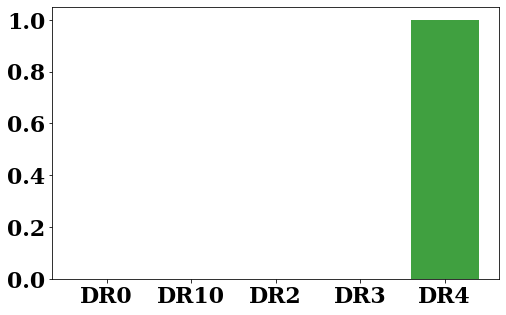

In [128]:
names = ['DR0','DR10','DR2','DR3','DR4']
values = [0,0,0,0,1]
plt.figure(figsize=(8,5))
plt.bar(names, [0,0,0,0,1], facecolor='g', alpha=0.75)
plt.savefig('gt.png')

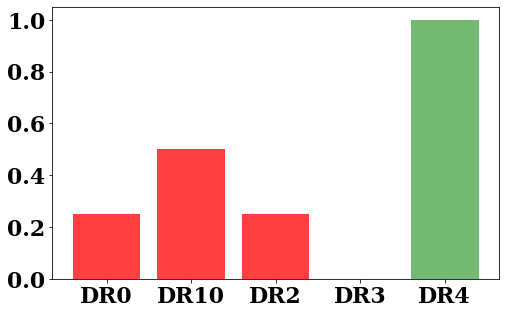

In [148]:
names = ['DR0','DR10','DR2','DR3','DR4']
values = [0.25,0.5,0.25,0,0]
plt.figure(figsize=(8,5))
plt.bar(names, values, facecolor='r', alpha=0.75)
plt.bar(names, [0,0,0,0,1], facecolor='g', alpha=0.55)
plt.ylim([0,1.05])
plt.savefig('pred.png')

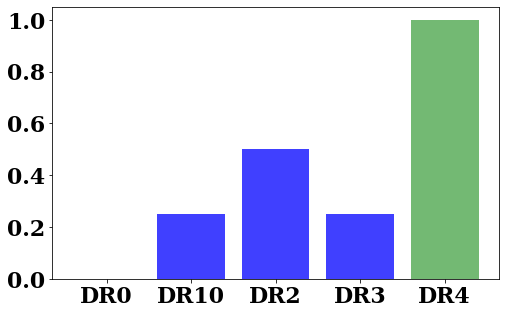

In [149]:
names = ['DR0','DR10','DR2','DR3','DR4']
values = [0,  0.25,0.5,0.25,0]
plt.figure(figsize=(8,5))
plt.bar(names, values, facecolor='b', alpha=0.75)
plt.bar(names, [0,0,0,0,1], facecolor='g', alpha=0.55)
plt.ylim([0,1.05])
plt.savefig('pred_better.png')

In [139]:
np.dot(np.array([4,3,2,1,0], dtype=float), np.array([0.25,0.5,0.25,0,0], dtype=float))

3.0

In [140]:
np.dot(np.array([4,3,2,1,0], dtype=float), np.array([0,  0.25,0.5,0.25,0], dtype=float))

2.0

In [131]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

In [132]:
cross_entropy(np.array([0,0,0,0,1], dtype=float), np.array([0.25,0.5,0.25,0,0], dtype=float))

4.144453267322666

In [133]:
cross_entropy(np.array([0,0,0,0,1], dtype=float), np.array([0,  0.25,0.5,0.25,0], dtype=float))

4.144453267322666

#### Best models this fold:

```
python train.py --csv_train train_clarity_3.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnext50 --n_classes 5 --n_epochs 50 --patience 5 --oversample 8/3/1/1/1 --save_model True --save_path best_c_f3 
```

### Fourth fold

In [99]:
df_train4.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
18,0:23:10,ce,train_clarity_4.csv,1.0,0.0,False,0.0001,auc,resnext50,5.0,50.0,8/3/1/1/1,5.0,0.5475,0.863701,0.687569
20,0:26:39,ce,train_clarity_4.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,8/3/1/1/1,5.0,0.5775,0.860377,0.710555
17,0:11:00,ce,train_clarity_4.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,8/3/1/1/1,5.0,0.5475,0.850626,0.685888
19,0:10:40,ce,train_clarity_4.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,5.0,50.0,8/3/1/1/1,5.0,0.5350,0.848789,0.687895
2,NaN,focal_loss,train_clarity_4.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,8/3/1/1/1,5.0,NaN,NaN,NaN


#### Best models this fold:

```
python train.py --csv_train train_clarity_4.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnext50 --n_classes 5 --n_epochs 50 --patience 5 --oversample 8/3/1/1/1 --save_model True --save_path best_c_f4 
```

# MIXING COEFFICIENTS

In [100]:
auc_f1 = 0.866204
auc_f2 = 0.882456
auc_f3 = 0.861069
auc_f4 = 0.863701
coeff_sum = auc_f1+auc_f2+auc_f3+auc_f4

In [101]:
coeff_f1 = auc_f1/coeff_sum
coeff_f2 = auc_f2/coeff_sum
coeff_f3 = auc_f3/coeff_sum
coeff_f4 = auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.24938000765813614 0.2540589561326988 0.24790164189288394 0.248659394316281


In [102]:
overall_mean_auc = (auc_f1+auc_f2+auc_f3+auc_f4)/4
overall_mean_auc

0.8683575000000001

# MIXING COEFFICIENTS MT vs CLARITY

In [103]:
coeff_mt_vs_c =  0.8600366527354641/(0.8600366527354641+0.8683575000000001), 0.8683575000000001/(0.8600366527354641+0.8683575000000001)
print('mt/q = ', coeff_mt_vs_c[0], coeff_mt_vs_c[1])

mt/q =  0.4975928964896789 0.5024071035103211


## Artifact

In [135]:
df_train1 = df_all[df_all.csv_train=='train_artifact_1.csv']
df_train2 = df_all[df_all.csv_train=='train_artifact_2.csv']
df_train3 = df_all[df_all.csv_train=='train_artifact_3.csv']
df_train4 = df_all[df_all.csv_train=='train_artifact_4.csv']

### First fold - trained

In [136]:
df_train1.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
15,0:43:45,focal_loss,train_artifact_1.csv,1.0,0.0,False,0.0003,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6625,0.889110,0.833875
32,0:42:50,focal_loss,train_artifact_1.csv,1.0,0.0,False,0.0001,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6500,0.886033,0.825609
66,0:24:48,ce,train_artifact_1.csv,1.0,0.0,False,0.0001,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6500,0.883499,0.836204
29,0:23:17,focal_loss,train_artifact_1.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,6.0,50.0,1/5/1/2/2/5,5.0,0.6650,0.879337,0.813087
30,0:50:38,focal_loss,train_artifact_1.csv,1.0,0.0,False,0.0001,auc,resnext50,6.0,50.0,1/5/1/2/2/5,5.0,0.6675,0.876764,0.814598


#### Best models this fold: 

```
python train.py --csv_train train_artifact_1.csv --base_loss focal_loss --exp 1 --lambd 0 --lr 0.0003 --load_checkpoint no --metric auc --model_name resnet50 --n_classes 6 --n_epochs 50 --patience 5 --oversample 1/5/1/2/2/5 --save_model True --save_path best_a_f1  
```

### Second fold

In [137]:
df_train2.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
25,0:37:03,focal_loss,train_artifact_2.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,6.0,50.0,1/5/1/2/2/5,5.0,0.6675,0.876377,0.770572
60,0:27:20,ce,train_artifact_2.csv,1.0,0.0,False,0.0001,auc,resnext50,6.0,50.0,1/5/1/2/2/5,5.0,0.6650,0.871661,0.759211
27,0:15:00,focal_loss,train_artifact_2.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,6.0,50.0,1/5/1/2/2/5,5.0,0.6625,0.871610,0.759115
9,0:23:16,focal_loss,train_artifact_2.csv,1.0,0.0,False,0.0003,auc,resnext50,6.0,50.0,1/5/1/2/2/5,5.0,0.6625,0.871339,0.759702
8,0:16:25,focal_loss,train_artifact_2.csv,1.0,0.0,False,0.0003,auc,resnext50_sws,6.0,50.0,1/5/1/2/2/5,5.0,0.7025,0.868967,0.749607


#### Best models this fold:

```
python train.py --csv_train train_artifact_2.csv --base_loss focal_loss --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnext50_sws --n_classes 6 --n_epochs 50 --patience 5 --oversample 1/5/1/2/2/5 --save_model True --save_path best_a_f2  
```

### Third fold

In [138]:
df_train3.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
58,0:21:47,ce,train_artifact_3.csv,1.0,0.0,False,0.0001,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6400,0.883412,0.774900
40,0:22:47,ce,train_artifact_3.csv,1.0,0.0,False,0.0003,auc,resnet50_sws,6.0,50.0,1/5/1/2/2/5,5.0,0.6800,0.882194,0.785982
56,0:25:48,ce,train_artifact_3.csv,1.0,0.0,False,0.0001,auc,resnext50,6.0,50.0,1/5/1/2/2/5,5.0,0.6575,0.881215,0.777643
23,0:13:54,focal_loss,train_artifact_3.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,6.0,50.0,1/5/1/2/2/5,5.0,0.6575,0.881213,0.784972
41,0:12:54,ce,train_artifact_3.csv,1.0,0.0,False,0.0003,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6500,0.879139,0.775613


#### Best models this fold:

``` 
python train.py --csv_train train_artifact_3.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnet50 --n_classes 6 --n_epochs 50 --patience 5 --oversample 1/5/1/2/2/5 --save_model True --save_path best_a_f3  
```

### Fourth fold

In [139]:
df_train4.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
3,0:19:07,focal_loss,train_artifact_4.csv,1.0,0.0,False,0.0003,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6725,0.869954,0.750660
54,0:21:09,ce,train_artifact_4.csv,1.0,0.0,False,0.0001,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6525,0.868749,0.730045
52,0:24:52,ce,train_artifact_4.csv,1.0,0.0,False,0.0001,auc,resnext50,6.0,50.0,1/5/1/2/2/5,5.0,0.6625,0.862731,0.722468
20,0:44:15,focal_loss,train_artifact_4.csv,1.0,0.0,False,0.0001,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6875,0.860622,0.762357
37,0:12:06,ce,train_artifact_4.csv,1.0,0.0,False,0.0003,auc,resnet50,6.0,50.0,1/5/1/2/2/5,5.0,0.6300,0.860435,0.723316


#### Best models this fold:

```
python train.py --csv_train train_artifact_4.csv --base_loss focal_loss --exp 1 --lambd 0 --lr 0.0003 --load_checkpoint no --metric auc --model_name resnet50 --n_classes 6 --n_epochs 50 --patience 5 --oversample 1/5/1/2/2/5 --save_model True --save_path best_a_f4  
```

## MIXING COEFFICIENTS - ok

In [167]:
auc_f1 = 0.889110
auc_f2 = 0.876377
auc_f3 = 0.883412
auc_f4 = 0.869954
coeff_sum = auc_f1+auc_f2+auc_f3+auc_f4

In [168]:
coeff_f1 = auc_f1/coeff_sum
coeff_f2 = auc_f2/coeff_sum
coeff_f3 = auc_f3/coeff_sum
coeff_f4 = auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.2526704014063674 0.24905189276164708 0.2510511237610665 0.24722658207091916


In [142]:
overall_mean_auc = (auc_f1+auc_f2+auc_f3+auc_f4)/4
overall_mean_auc

0.8797132499999999

# MIXING COEFFICIENTS MT vs ARTIFACT

In [143]:
coeff_mt_vs_a =  0.8826350593473746/(0.8826350593473746+0.8797132499999999), 0.8797132499999999/(0.8826350593473746+0.8797132499999999)
print('mt/a = ', coeff_mt_vs_a[0], coeff_mt_vs_a[1])

mt/a =  0.5008289534287511 0.4991710465712488


## Field Def

In [177]:
df_train1 = df_all[df_all.csv_train=='train_field_def_1.csv']
df_train2 = df_all[df_all.csv_train=='train_field_def_2.csv']
df_train3 = df_all[df_all.csv_train=='train_field_def_3.csv']
df_train4 = df_all[df_all.csv_train=='train_field_def_4.csv']

### First fold

In [178]:
df_train1.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
15,0:16:28,ce,train_field_def_1.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,10/4/1/1/1,5.0,0.663342,0.837081,0.504409
14,0:11:00,ce,train_field_def_1.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,5.0,50.0,10/4/1/1/1,5.0,0.670823,0.832489,0.534790
12,0:11:51,ce,train_field_def_1.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,10/4/1/1/1,5.0,0.665835,0.798533,0.423453
13,0:19:21,ce,train_field_def_1.csv,1.0,0.0,False,0.0001,auc,resnext50,5.0,50.0,10/4/1/1/1,5.0,0.698254,0.795443,0.502341


#### Best models this fold: trained

```
python train.py --csv_train train_field_def_1.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnet50 --n_classes 5 --n_epochs 50 --patience 5 --oversample 10/4/1/1/1 --save_model True --save_path best_f_f1  
```

### Second fold

In [179]:
df_train2.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
10,0:14:47,ce,train_field_def_2.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,5.0,50.0,10/4/1/1/1,5.0,0.7300,0.865759,0.595813
9,0:42:36,ce,train_field_def_2.csv,1.0,0.0,False,0.0001,auc,resnext50,5.0,50.0,10/4/1/1/1,5.0,0.7050,0.863527,0.630050
8,0:19:13,ce,train_field_def_2.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,10/4/1/1/1,5.0,0.6900,0.862495,0.511195
11,0:22:32,ce,train_field_def_2.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,10/4/1/1/1,5.0,0.6725,0.862081,0.513807


#### Best models this fold:  trained

```
python train.py --csv_train train_field_def_2.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnet50_sws --n_classes 5 --n_epochs 50 --patience 5 --oversample 10/4/1/1/1 --save_model True --save_path best_f_f2  
```

### Third fold

In [180]:
df_train3.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
4,0:18:01,ce,train_field_def_3.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,10/4/1/1/1,5.0,0.6650,0.797209,0.515115
6,0:17:01,ce,train_field_def_3.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,5.0,50.0,10/4/1/1/1,5.0,0.7125,0.794282,0.612088
7,0:18:33,ce,train_field_def_3.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,10/4/1/1/1,5.0,0.6575,0.748110,0.434910
5,0:27:32,ce,train_field_def_3.csv,1.0,0.0,False,0.0001,auc,resnext50,5.0,50.0,10/4/1/1/1,5.0,0.6850,0.728467,0.451016


#### Best models this fold:  trained

```
python train.py --csv_train train_field_def_3.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnext50_sws --n_classes 5 --n_epochs 50 --patience 5 --oversample 10/4/1/1/1 --save_model True --save_path best_f_f3  
```

### Fourth fold

In [181]:
df_train4.sort_values('auc', ascending=False).head(5)

,time,base_loss,csv_train,exp,lambd,load_checkpoint,lr,metric,model_name,n_classes,n_epochs,oversample,patience,acc,auc,kappa
3,0:25:04,ce,train_field_def_4.csv,1.0,0.0,False,0.0001,auc,resnet50,5.0,50.0,10/4/1/1/1,5.0,0.749373,0.806378,0.568425
1,0:30:02,ce,train_field_def_4.csv,1.0,0.0,False,0.0001,auc,resnext50,5.0,50.0,10/4/1/1/1,5.0,0.746867,0.794555,0.529712
0,0:10:45,ce,train_field_def_4.csv,1.0,0.0,False,0.0001,auc,resnext50_sws,5.0,50.0,10/4/1/1/1,5.0,0.724311,0.758666,0.417177
2,0:11:45,ce,train_field_def_4.csv,1.0,0.0,False,0.0001,auc,resnet50_sws,5.0,50.0,10/4/1/1/1,5.0,0.739348,0.744797,0.541978


#### Best models this fold:  trained

```
python train.py --csv_train train_field_def_4.csv --base_loss ce --exp 1 --lambd 0 --lr 0.0001 --load_checkpoint no --metric auc --model_name resnet50 --n_classes 5 --n_epochs 50 --patience 5 --oversample 10/4/1/1/1 --save_model True --save_path best_f_f4  
```

## MIXING COEFFICIENTS - ok

In [182]:
auc_f1 = 0.837081
auc_f2 = 0.865759
auc_f3 = 0.797209
auc_f4 = 0.806378
coeff_sum = auc_f1+auc_f2+auc_f3+auc_f4

In [183]:
coeff_f1 = auc_f1/coeff_sum
coeff_f2 = auc_f2/coeff_sum
coeff_f3 = auc_f3/coeff_sum
coeff_f4 = auc_f4/coeff_sum
print(coeff_f1,coeff_f2,coeff_f3,coeff_f4)

0.2531678455323526 0.2618412564378406 0.24110890698630275 0.24388199104350408


In [184]:
overall_mean_auc = (auc_f1+auc_f2+auc_f3+auc_f4)/4
overall_mean_auc

0.82660675

# MIXING COEFFICIENTS MT vs FIELD_DEF

In [186]:
coeff_mt_vs_f =  0.7822161548105864/(0.7822161548105864+0.82660675), 0.82660675/(0.7822161548105864+0.82660675)
print('mt/f = ', coeff_mt_vs_a[0], coeff_mt_vs_a[1])

mt/f =  0.5008289534287511 0.4991710465712488
